# Task 3: Customer Segmentation / Clustering

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [5]:
# Merge datasets and aggregate transaction data
transactions_merged = pd.merge(customers_df, 
                                transactions_df.groupby('CustomerID').agg(
                                    total_spent=('TotalValue', 'sum'),
                                    total_transactions=('TransactionID', 'count')
                                ).reset_index(), 
                                on='CustomerID', how='left').fillna(0)

In [6]:
# Encode and normalize features
transactions_merged['Region'] = LabelEncoder().fit_transform(transactions_merged['Region'])
features = StandardScaler().fit_transform(transactions_merged[['Region', 'total_spent', 'total_transactions']])

In [7]:
# Determine optimal number of clusters using DB Index
cluster_range = range(2, 11)
db_scores = []
silhouette_scores = []
optimal_k = 2
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(features)
    db_scores.append(davies_bouldin_score(features, cluster_labels))
    silhouette_scores.append(silhouette_score(features, cluster_labels))
    if db_scores[-1] == min(db_scores):
        optimal_k = k

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [8]:
# Perform final clustering with optimal number of clusters
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
transactions_merged['Cluster'] = final_kmeans.fit_predict(features)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


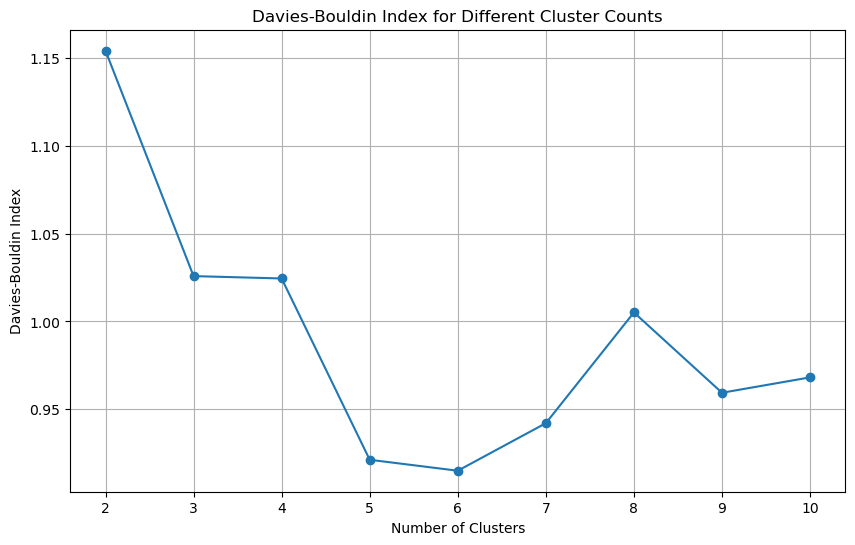

In [9]:
# Plot Davies-Bouldin Index for each cluster count
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

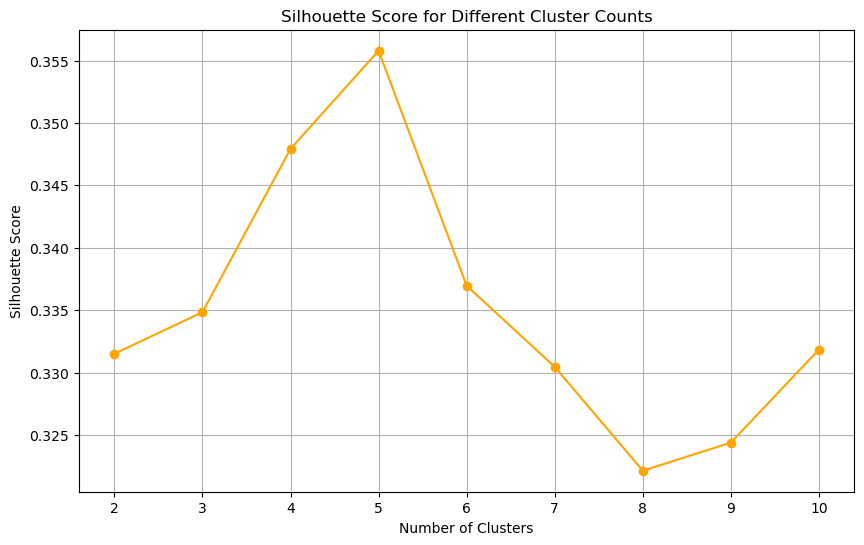

In [10]:

# Plot Silhouette Score for each cluster count
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Different Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

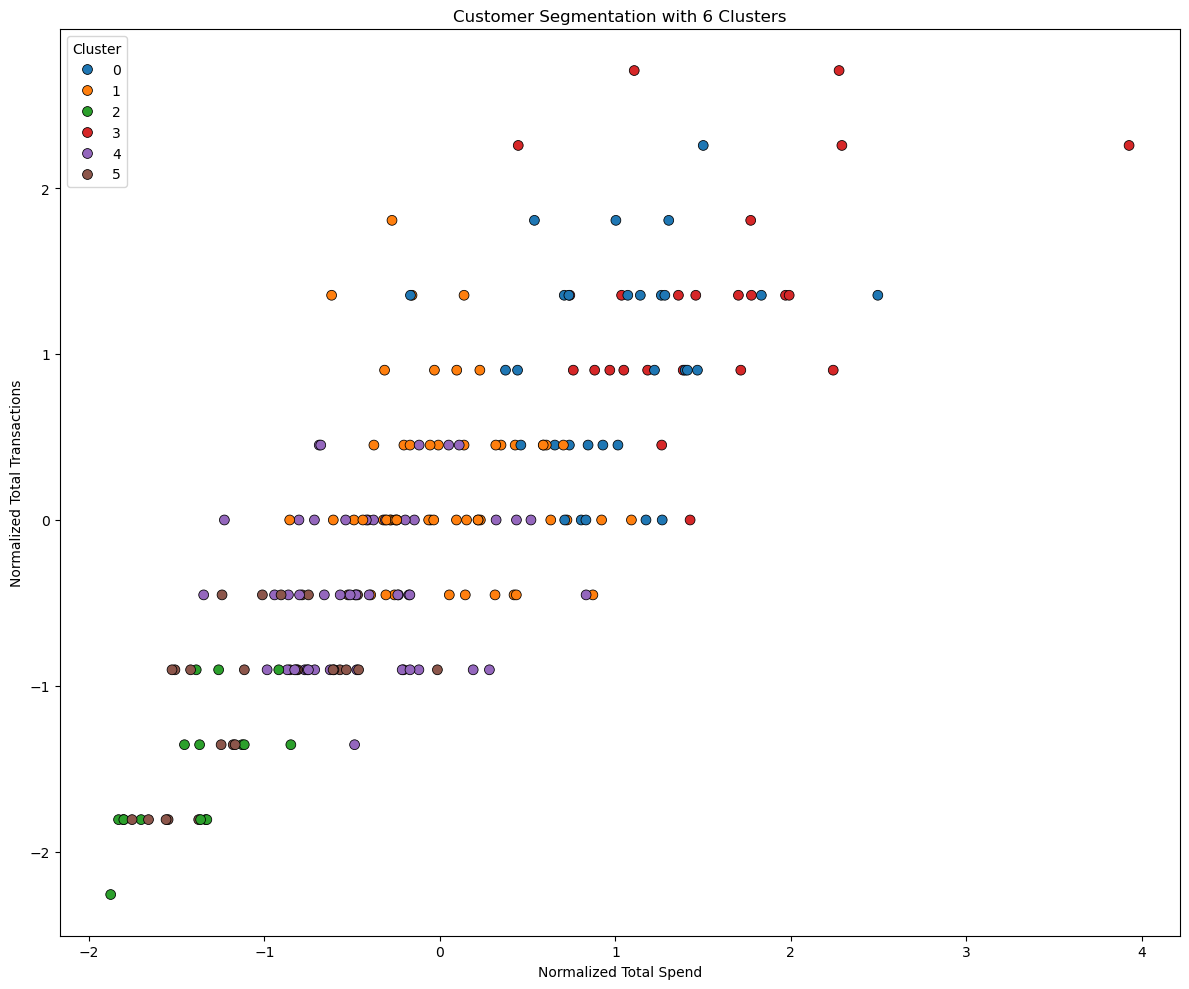

In [11]:
# Improved visualization for clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x=features[:, 1], y=features[:, 2], hue=transactions_merged['Cluster'], palette="tab10", s=50, edgecolor="k"
)
plt.title(f"Customer Segmentation with {optimal_k} Clusters")
plt.xlabel("Normalized Total Spend")
plt.ylabel("Normalized Total Transactions")
plt.legend(title="Cluster", loc="best")
plt.tight_layout()
plt.show()


In [12]:
# Print clustering metrics
print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Davies-Bouldin Index for Optimal Clusters: {min(db_scores):.4f}")
print(f"Silhouette Score for Optimal Clusters: {silhouette_scores[db_scores.index(min(db_scores))]:.4f}")

Optimal Number of Clusters: 6
Davies-Bouldin Index for Optimal Clusters: 0.9149
Silhouette Score for Optimal Clusters: 0.3370


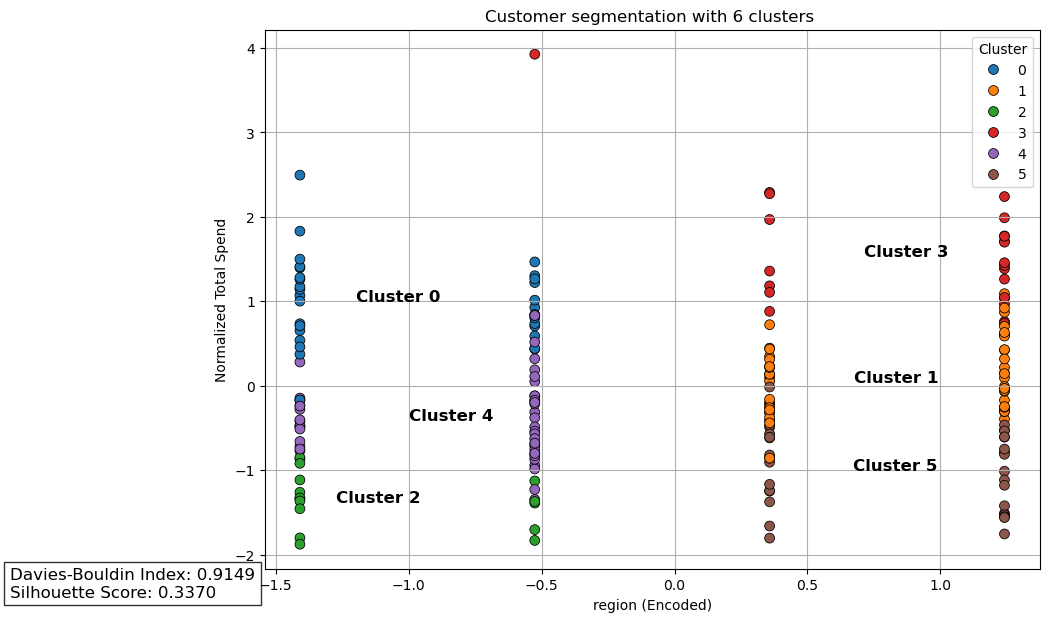

Davies-Bouldin Index: 0.9149
Silhouette Score: 0.3370


In [28]:


# Calculate clustering metrics
db_index = davies_bouldin_score(features, transactions_merged['Cluster'])
silhouette_avg = silhouette_score(features, transactions_merged['Cluster'])

# Simple labeled scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=features[:, 0], y=features[:, 1],
    hue=transactions_merged['Cluster'],
    palette="tab10", s=50, edgecolor="k"
)

# Add labels for clusters
for cluster in np.unique(transactions_merged['Cluster']):
    cluster_points = features[transactions_merged['Cluster'] == cluster]
    centroid = np.mean(cluster_points, axis=0)
    plt.text(centroid[0], centroid[1], f"Cluster {cluster}",
             fontsize=12, weight='bold', ha='center')

# Add metrics to the plot
plt.text(-2.5, -2.5, f"Davies-Bouldin Index: {db_index:.4f}\nSilhouette Score: {silhouette_avg:.4f}",
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8), ha='left')

plt.title("Customer segmentation with 6 clusters ")
plt.xlabel("region (Encoded)")
plt.ylabel("Normalized Total Spend")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Print clustering metrics in the console
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")
